<a href="https://colab.research.google.com/github/baby1146/baby1146/blob/main/E_commerce_Furniture_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**E-Commerce Furniture Sales Analysis**

##1. Project Objective:
Analyze e-commerce furniture sales data to uncover trends, pricing strategies, and customer preferences. Provide insights to optimize pricing, forecast demand, and improve overall sales performance.



**Tech Stack:** Python, pandas, matplotlib, seaborn

##2. Data Collection

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

We have a dataset of furniture sales in CSV format. Let's load it using Pandas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub
import os
# Download latest version
dataset_dir = kagglehub.dataset_download("kanchana1990/e-commerce-furniture-dataset-2024")

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_path = os.path.join(dataset_dir, filename)
        break  # Assuming there's only one CSV file

# Read the CSV file using pandas
df = pd.read_csv(csv_path)
df

100%|██████████| 81.2k/81.2k [00:00<00:00, 39.4MB/s]

Extracting files...


,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping


In [4]:
df

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping


This dataset comprises 2,000 entries scraped from AliExpress, detailing a variety of
furniture products. It captures key sales metrics and product details, offering a
snapshot of consumer purchasing patterns and market trends in the online furniture
retail space.

We can view some basic information about the data frame using the .**info** method.





In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [6]:
df.describe()


,sold
count,2000.000000
mean,23.493500
std,254.094061
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,10000.000000


It appears that each column contains values of a specific data type. You can view statistical information for numerical columns (mean, standard deviation, minimum/maximum values, and the number of non-empty values) using the .**describe** method.



In [7]:
df.columns

Index(['productTitle', 'originalPrice', 'price', 'sold', 'tagText'], dtype='object')

You can also retrieve the number of rows and columns in the data frame using the .shape property

In [8]:
df.shape

(2000, 5)

.shape return the tuple. so we can access the elements with shape[0],shape[1].

In [9]:
df.shape[0]

2000

In [10]:
df.shape[1]

5

we can retrieve the column values from the following methods

In [11]:
df['productTitle']

,productTitle
0,Dresser For Bedroom With 9 Fabric Drawers Ward...
1,Outdoor Conversation Set 4 Pieces Patio Furnit...
2,Desser For Bedroom With 7 Fabric Drawers Organ...
3,"Modern Accent Boucle Chair,Upholstered Tufted ..."
4,Small Unit Simple Computer Desk Household Wood...
...,...
1995,Modern TV Stand Entertainment Center with Two ...
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr..."
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w..."
1998,Furniture Acrylic Coffee Table Transparent Liv...


Each column is represented using a data structure called Series, which is essentially a numpy array with some extra methods and properties.

you can also pass a list of columns within the indexing notation [] to access a subset of the data frame with just the given columns.

In [12]:
sub_df = df[["productTitle","price"]]

In [13]:
sub_df

,productTitle,price
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,$46.79
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,$169.72
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$39.46
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",$111.99
4,Small Unit Simple Computer Desk Household Wood...,$21.37
...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,$72.49
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",$276.65
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",$196.44
1998,Furniture Acrylic Coffee Table Transparent Liv...,$228.18


The new data frame sub_df is simply a "view" of the original data frame `df`. Both point to the same data in the computer's memory. Changing any values inside one of them will also change the respective values in the other.

Sometimes you might need a full copy of the data frame, in which case you can use the copy method.

In [14]:
copy_df = df.copy()

In [15]:
copy_df

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping


To access a specific row of data, Pandas provides the .loc method.
Each retrieved row is also a Series object.

In [16]:
df.loc[200]

,200
productTitle,"Nightstand, 2 Drawer Dresser for Bedroom, End ..."
originalPrice,$67.36
price,$26.79
sold,4
tagText,Free shipping


We can use the .head and .tail methods to view the first or last few rows of data.

In [17]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [18]:
df.tail()

,productTitle,originalPrice,price,sold,tagText
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping
1999,Bed Frane Bamboo and Metal Platform Bed Frame ...,NaN,$99.48,0,Free shipping


##3.Data Cleaning and Preprocessing

Let's start by cleaning the dataset. We'll handle missing values, convert data types, and ensure the data is ready for analysis.

In [19]:
df.isnull().sum()

,0
productTitle,0
originalPrice,1513
price,0
sold,0
tagText,3


 We assume that for the null value data points there were no discounts and as such the Price will also be the originalPrice and copy that data.

In [20]:
# Filled na values in originalPrice column with values in price column as no discounts were applied
df['originalPrice'].fillna(df['price'], inplace=True)
df['tagText'].fillna('Free shipping', inplace=True)

# Verify changes
df.isnull().sum()

,0
productTitle,0
originalPrice,0
price,0
sold,0
tagText,0


`Price` and `Original` Price columns contain numbers . so we neend to convert that into float

In [21]:
# Remove dollar sign from price column
df['price'] = df['price'].str.replace('$','',).str.replace(',','')
df['originalPrice'] = df['originalPrice'].str.replace('$','',).str.replace(',','')
# Change price column from string to float
df['price'] = df['price'].astype('float')
df['originalPrice'] = df['originalPrice'].astype('float')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productTitle   2000 non-null   object 
 1   originalPrice  2000 non-null   float64
 2   price          2000 non-null   float64
 3   sold           2000 non-null   int64  
 4   tagText        2000 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 78.3+ KB


In [23]:
df.tagText.unique()

array(['Free shipping', '+Shipping: $12.03', '+Shipping: $29.45',
       '+Shipping: $36.4', '+Shipping: $86.91', '+Shipping: $225.12',
       '+Shipping: $7.8', '+Shipping: $29.52', '+Shipping: $38.07',
       '+Shipping: $104.89', '+Shipping: $239.64', '+Shipping: $41.19',
       '+Shipping: $18.44', '+Shipping: $80.21', '+Shipping: $5.09',
       '+Shipping: $110.64', '+Shipping: $64.01', '+Shipping: $150.28',
       '+Shipping: $129.03', '+Shipping: $52.63', '+Shipping: $76.6',
       '+Shipping: $210.53', '+Shipping: $64.56', '+Shipping: $120.25',
       '+Shipping: $5.39', '+Shipping: $4.74', '+Shipping: $258.18',
       '+Shipping: $72.79', '+Shipping: $168.91', '+Shipping: $109.18',
       '+Shipping: $106.13', '+Shipping: $94.92', '+Shipping: $1,097.18',
       '+Shipping: $170.31', '+Shipping: $88.26', '+Shipping: $23.49',
       '+Shipping: $30.44', '+Shipping: $14.97', '+Shipping: $75.99',
       '+Shipping: $14.91', '+Shipping: $18.81', '+Shipping: $69.95',
       '+Shippi

In [24]:
# Rename columns
df.rename({'sold':'quantity sold','tagText':'Shipping Cost'},axis=1,inplace=True)

In [25]:
df.columns

Index(['productTitle', 'originalPrice', 'price', 'quantity sold',
       'Shipping Cost'],
      dtype='object')

In [26]:
# Remove'+Shipping: $' from the cost of shipping column and convert 'Free shipping' to 0
df['Shipping Cost'] = df['Shipping Cost'].str.replace('Free shipping', '')
df['Shipping Cost'] = df['Shipping Cost'].str.replace(r'\+Shipping: \$', '',regex=True)
df['Shipping Cost'] = df['Shipping Cost'].str.replace(',', '')

df['Shipping Cost'] = df['Shipping Cost'].replace(['', 'nan'], '0')

# Convert cost of shipping column from string to float
df['Shipping Cost'] = df['Shipping Cost'].astype('float')


In [27]:
df['Shipping Cost'].unique()

array([   0.  ,   12.03,   29.45,   36.4 ,   86.91,  225.12,    7.8 ,
         29.52,   38.07,  104.89,  239.64,   41.19,   18.44,   80.21,
          5.09,  110.64,   64.01,  150.28,  129.03,   52.63,   76.6 ,
        210.53,   64.56,  120.25,    5.39,    4.74,  258.18,   72.79,
        168.91,  109.18,  106.13,   94.92, 1097.18,  170.31,   88.26,
         23.49,   30.44,   14.97,   75.99,   14.91,   18.81,   69.95,
         21.07,    2.91,  373.41,   34.4 , 1115.86,   86.33,   74.22,
         21.65,   63.08,    5.86,  112.1 ,  322.02,    7.38,   85.45,
         30.86,  140.27,   60.41,  132.48,   44.55,  255.93,   72.12,
         66.53,  142.23,   23.29,   28.9 ,    8.86,  744.64,   21.62,
         12.82, 1323.31,   85.58,  350.41,   55.98,  141.75,  397.72,
         84.44,  106.05,   97.54,  303.1 ,  227.23,  122.29,   66.35,
         85.31,   34.63,    2.33,  381.73,  363.95,   60.62,  230.37,
         13.95,   54.16,   67.69,  134.27,   92.22,  151.69,   41.93,
         78.61,  171

##4.Exploratory Data Analysis (EDA)

Now that our data is clean, let's perform some exploratory data analysis to understand the distribution and relationships within the data.



In [28]:
# Create new column for revenue
df['total revenue'] = df['price'] * df['quantity sold']

# Create new column for discount
df['discount'] = df['originalPrice'] - df['price']

# Create new column for discount percentage
df['discount percentage'] = (df['discount'] / df['originalPrice']) * 100

In [29]:
df

,productTitle,originalPrice,price,quantity sold,Shipping Cost,total revenue,discount,discount percentage
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,46.79,600,0.0,28074.00,0.00,0.000000
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,169.72,0,0.0,0.00,0.00,0.000000
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,0.0,276.22,38.94,49.668367
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,111.99,0,0.0,0.00,0.00,0.000000
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,0.0,21.37,27.45,56.226956
...,...,...,...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,72.49,72.49,8,0.0,579.92,0.00,0.000000
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",276.65,276.65,2,0.0,553.30,0.00,0.000000
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",196.44,196.44,10,0.0,1964.40,0.00,0.000000
1998,Furniture Acrylic Coffee Table Transparent Liv...,228.18,228.18,0,0.0,0.00,0.00,0.000000


In [30]:
# Calculate gross profit and margin

df['gross profit'] = df['total revenue'] - (df['originalPrice'] * df['quantity sold'])
df['gross profit margin'] = np.where(df['total revenue'] !=0, (df['gross profit'] / df['total revenue']) * 100, 0)

In [31]:
# Flag discounted items
df['discount_flag'] =(df['originalPrice'] - df['price']) > 0

# Flag loss-making items
df['loss_flag'] = df['gross profit'] < 0

In [32]:
discounted_items = df[df['discount_flag']]
loss_items = df[df['loss_flag']]

In [33]:
loss_items

,productTitle,originalPrice,price,quantity sold,Shipping Cost,total revenue,discount,discount percentage,gross profit,gross profit margin,discount_flag,loss_flag
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,0.0,276.22,38.94,49.668367,-272.58,-98.682210,True,True
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,0.0,21.37,27.45,56.226956,-27.45,-128.451100,True,True
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,0.0,6540.20,1170.64,90.463973,-62043.92,-948.654781,True,True
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,0.0,3672.90,739.59,50.169926,-3697.95,-100.682022,True,True
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,0.0,12918.36,340.23,50.669427,-13268.97,-102.714044,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1934,"Living Room Sofa, 149-Inch U-Shaped Sectional ...",1239.31,613.66,2,0.0,1227.32,625.65,50.483737,-1251.30,-101.953851,True,True
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",392.22,232.83,5,0.0,1164.15,159.39,40.637907,-796.95,-68.457673,True,True
1948,Vanity Table Set with Mirror 2 Storage Drawer ...,135.02,102.02,1,0.0,102.02,33.00,24.440824,-33.00,-32.346599,True,True
1955,"White Vanity Desk with Mirror, Lights and Char...",950.85,188.67,11,0.0,2075.37,762.18,80.157754,-8383.98,-403.975195,True,True


In [34]:
# Calculate net profit
df['net profit'] = df['total revenue'] - (df['originalPrice'] * df['quantity sold']) - (df['Shipping Cost'] * df['quantity sold'])
# Calculate net profit margin
df['net profit margin'] = np.where(df['total revenue'] !=0, (df['net profit'] / df['total revenue']) * 100, 0)

In [35]:
#Least expensive product
low_expense= df['price'].idxmin()
least_expensive_product=df.loc[low_expense]
print(least_expensive_product)

productTitle           1PC Mini House Night Table Model Wooden Mini B...
originalPrice                                                       4.94
price                                                               0.99
quantity sold                                                          7
Shipping Cost                                                        0.0
total revenue                                                       6.93
discount                                                            3.95
discount percentage                                            79.959514
gross profit                                                      -27.65
gross profit margin                                          -398.989899
discount_flag                                                       True
loss_flag                                                           True
net profit                                                        -27.65
net profit margin                                  

In [36]:
# Function to extract product type from the title
def extract_product_type(title):
    keywords = [
        'Chair', 'Table', 'Dresser', 'Sofa', 'Bed', 'Dining Set',
        'Desk', 'Cabinet', 'Shelf', 'Stool', 'Bench', 'Wardrobe',
        'Bookshelf', 'Nightstand', 'Couch', 'Armchair', 'Recliner',
        'Ottoman', 'Vanity', 'Coffee Table', 'End Table', 'Side Table',
        'Entertainment Center', 'TV Stand', 'Loveseat', 'Chaise',
        'Sectional', 'Buffet', 'Hutch', 'Bar Stool', 'Counter Stool',
        'Futon', 'Daybed', 'Headboard', 'Footboard', 'Pantry', 'Credenza',
        'Console Table', 'Filing Cabinet', 'Accent Table', 'Hall Tree',
        'Murphy Bed', 'Chaise Lounge', 'Chaise Longue', 'Chiffonier',
        'Chest of Drawers', 'China Cabinet', 'Curio Cabinet', 'Baker’s Rack',
        'Piano Bench', 'Storage Bench', 'Swivel Chair', 'Wingback Chair',
        'Rocking Chair', 'Lift Chair', 'Glider', 'Bean Bag'
    ]
    for keyword in keywords:
        if keyword.lower() in title.lower():
            return keyword
    return 'Other'

# Function to extract brand from the title
def extract_brand(title):
    brand_patterns = [
        'Christopher Knight Home', 'Project 62', 'Eco Dream',
        'Room & Joy', 'Captiva Designs', 'Ikea', 'Ashley Furniture',
        'Home Depot', 'Wayfair', 'Herman Miller', 'Steelcase',
        'Havertys', 'West Elm', 'Pottery Barn', 'La-Z-Boy'
    ]
    for brand in brand_patterns:
        if brand.lower() in title.lower():
            return brand
    return 'Unknown'

In [37]:
# Apply the functions to create new columns
df['product type'] = df['productTitle'].apply(extract_product_type)
df['brand'] = df['productTitle'].apply(extract_brand)

## Visualize Insights

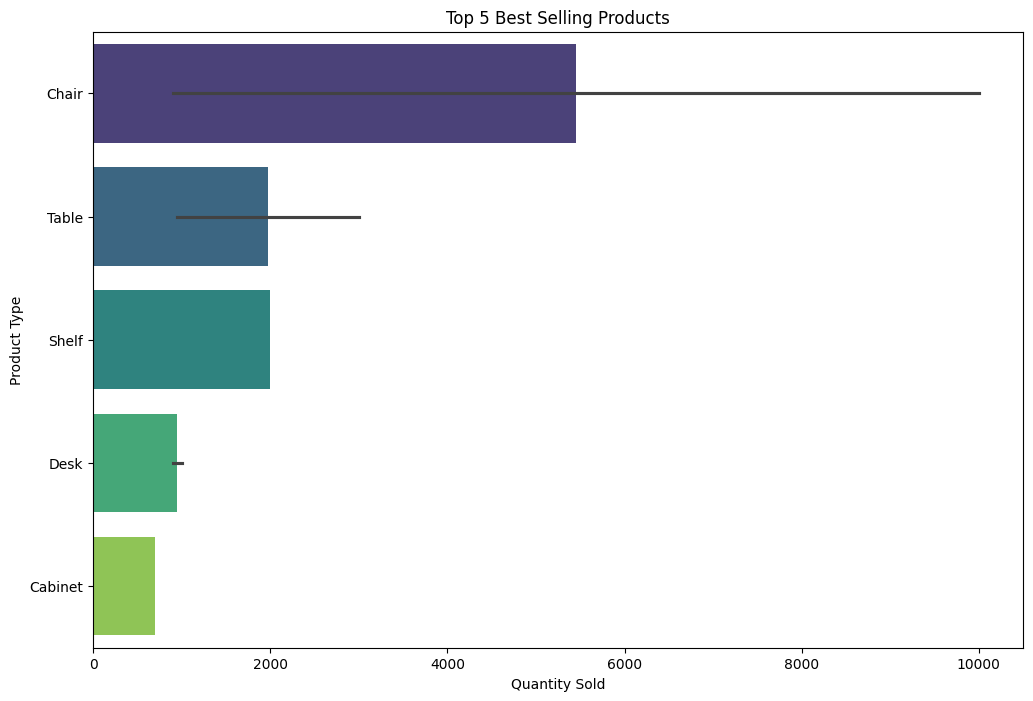

In [38]:
# Top 5 Best Selling Products
top_sold = df.sort_values(by='quantity sold', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='quantity sold', y='product type', data=top_sold, palette='viridis')
plt.title('Top 5 Best Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Type')
plt.show()

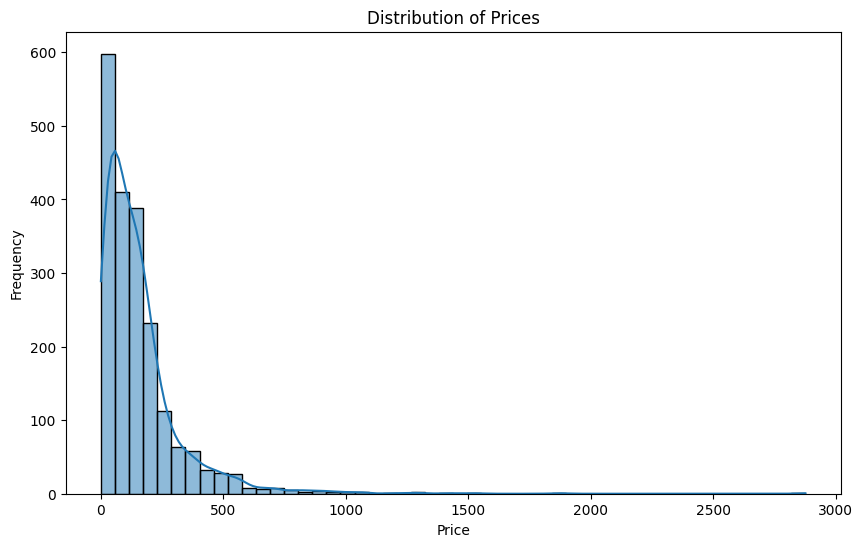

In [39]:
# Price Distribution of prices and quantities sold
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

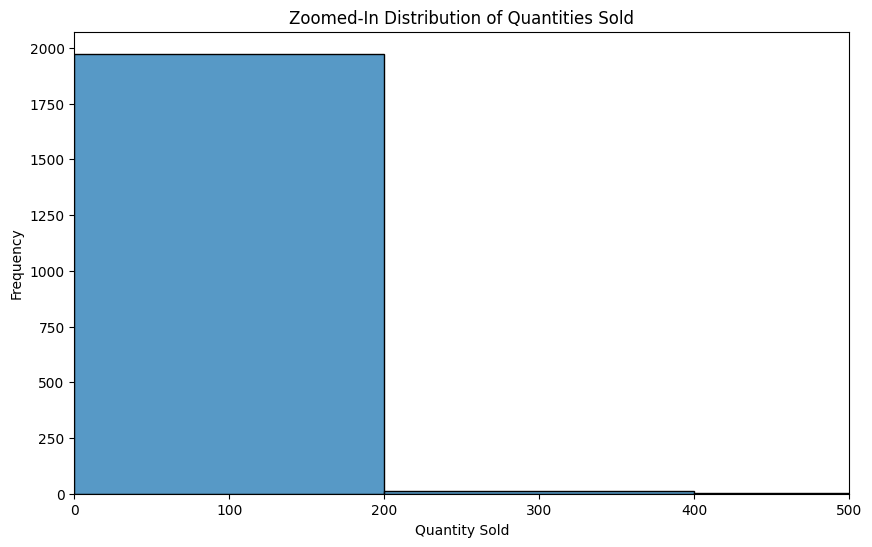

In [40]:
# Quantities Sold
plt.figure(figsize=(10,6))
sns.histplot(df['quantity sold'], bins=50, kde=False)
plt.xlim(0, 500)  # Adjust this based on your data
plt.title('Zoomed-In Distribution of Quantities Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()


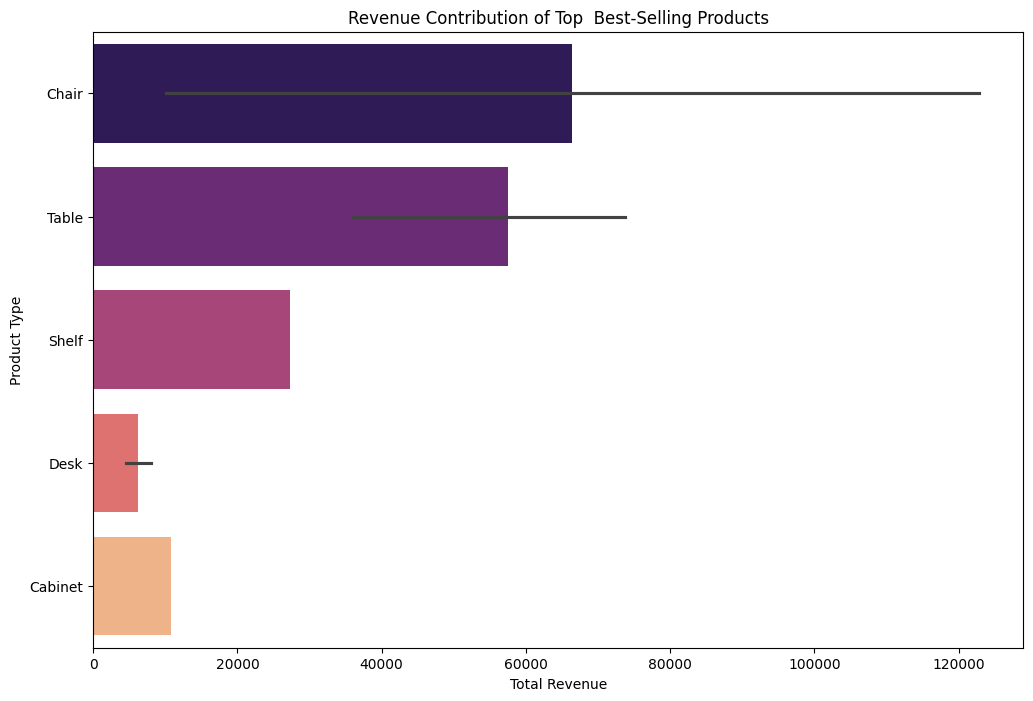

In [41]:
# Revenue contributino of Top 5 Best Selling Products
plt.figure(figsize=(12, 8))
sns.barplot(x='total revenue', y='product type', data=top_sold, palette='magma')
plt.title('Revenue Contribution of Top  Best-Selling Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product Type')
plt.show()

In [42]:
# Aggregating similar products under common categories
df['product category'] = df['productTitle'].apply(lambda x: ' '.join(x.split()[:2]))

# Creating a new column combining brand and productType
df['brand product'] = df['brand'] + ' ' + df['product type']

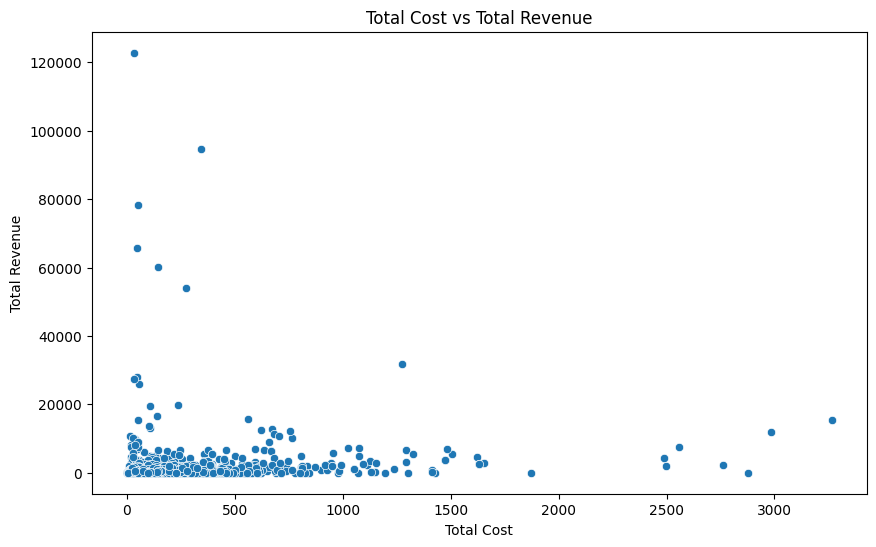

In [43]:
# Total Cost vs Total Revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['originalPrice'] + df['Shipping Cost'], y='total revenue', data=df)
plt.title('Total Cost vs Total Revenue')
plt.xlabel('Total Cost')
plt.ylabel('Total Revenue')
plt.show()

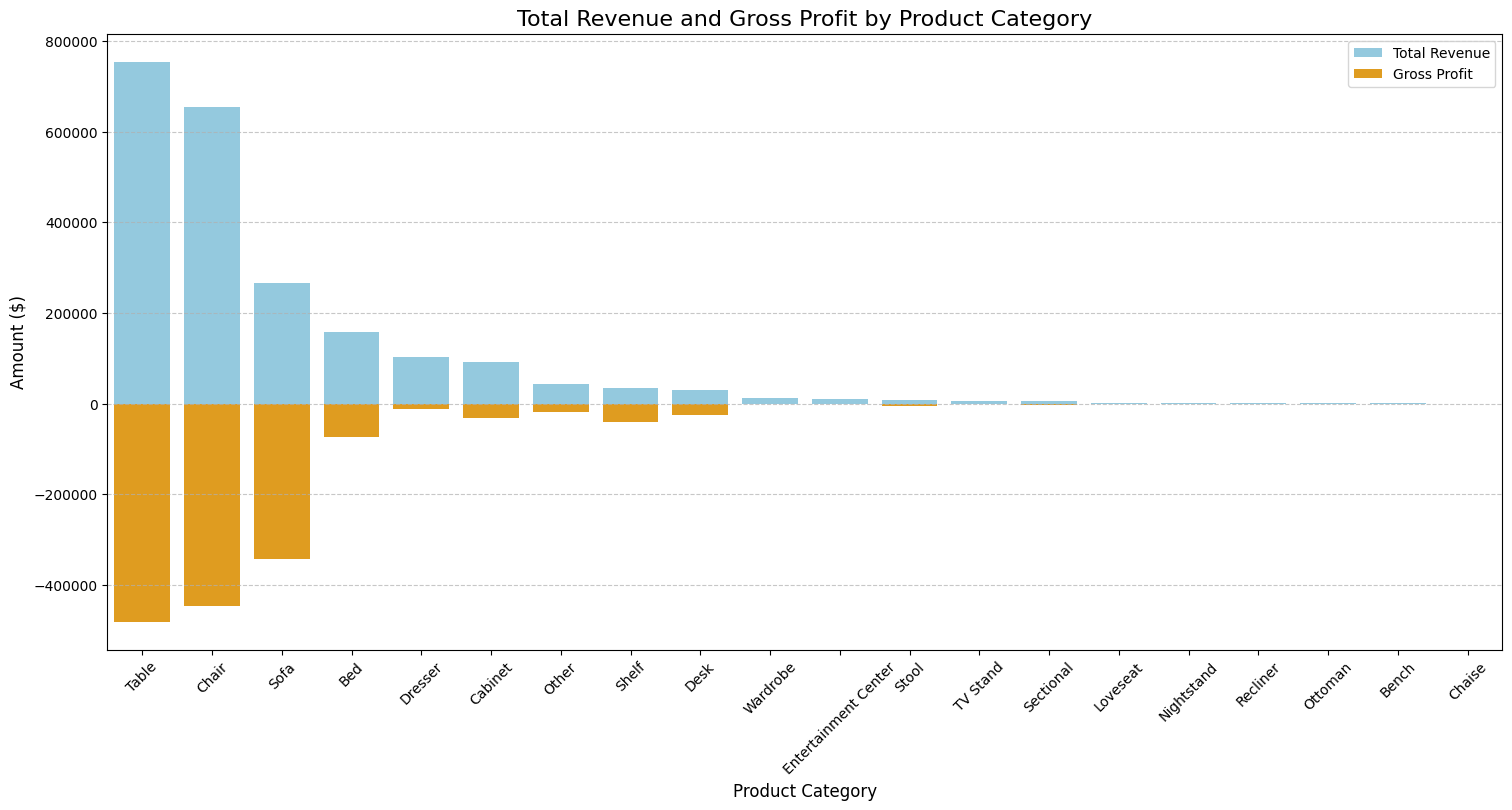

In [44]:
# Total Revenue and Gross Profit By Category
# Group data by category
category_group = df.groupby('product type')[['total revenue', 'gross profit']].sum().reset_index()

# Sort categories by total revenue (optional)
category_group = category_group.sort_values(by='total revenue', ascending=False)

# Plot revenue and profit by category
plt.figure(figsize=(18, 8))
sns.barplot(data=category_group, x='product type', y='total revenue', color='skyblue', label='Total Revenue')
sns.barplot(data=category_group, x='product type', y='gross profit', color='orange', label='Gross Profit')

plt.title('Total Revenue and Gross Profit by Product Category', fontsize=16)
plt.ylabel('Amount ($)', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [45]:
df[['product type','product category']]

,product type,product category
0,Dresser,Dresser For
1,Chair,Outdoor Conversation
2,Bed,Desser For
3,Chair,Modern Accent
4,Table,Small Unit
...,...,...
1995,Bed,Modern TV
1996,Dresser,Large Wardrobe
1997,Sofa,Velvet Futon
1998,Table,Furniture Acrylic


In [46]:

# Calculate discount per unit
df['discount per unit'] = df['originalPrice'] - df['price']

# Calculate total discount
df['total discount'] = df['discount per unit'] * df['quantity sold']

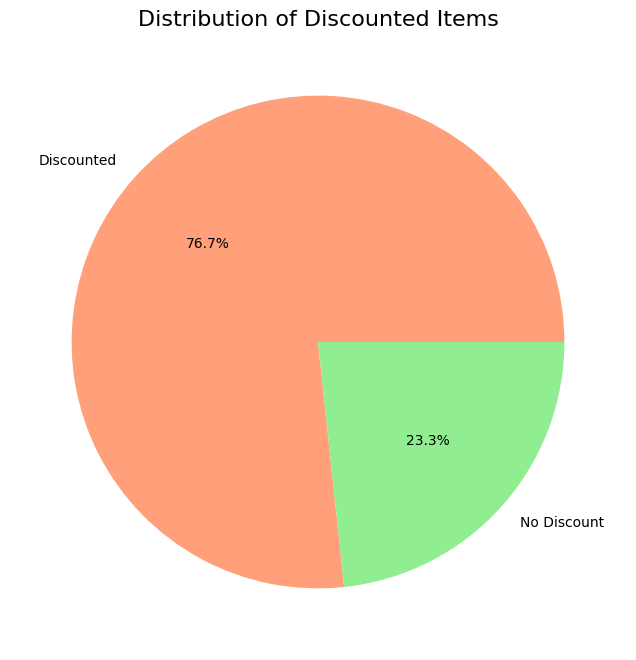

In [47]:
# Distribution of Discounted Items
discount_counts = df['discount_flag'].value_counts()

plt.figure(figsize=(8, 8))
discount_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Discounted', 'No Discount'], colors=['#FFA07A', '#90EE90'])
plt.title('Distribution of Discounted Items', fontsize=16)
plt.ylabel('')
plt.show()


High Discounts are Unsustainable:

Offering very high discounts leads to significant losses. Discounts above $50,000 consistently result in losses.
Focus on Low Discount Products:

Products with lower discounts (< $10,000) tend to remain profitable. These may represent optimized pricing strategies.


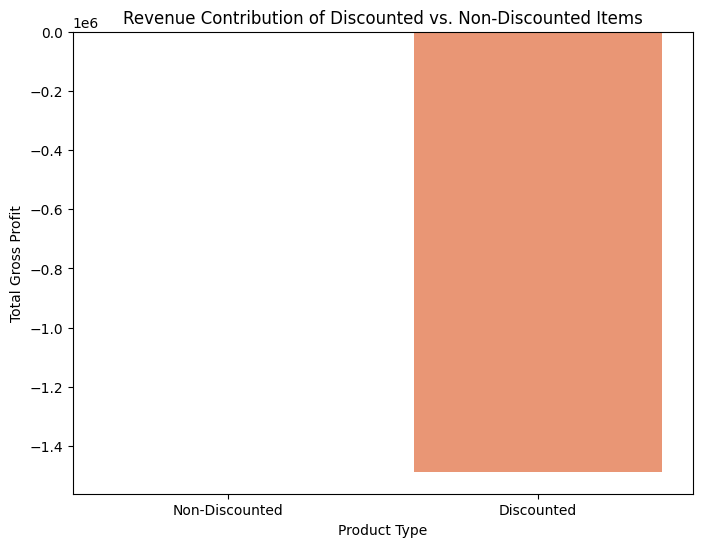

In [48]:
revenue_group = df.groupby('discount_flag')['gross profit'].sum().reset_index()
revenue_group['discount_flag'] = revenue_group['discount_flag'].map({True: 'Discounted', False: 'Non-Discounted'})

plt.figure(figsize=(8, 6))
sns.barplot(data=revenue_group, x='discount_flag', y='gross profit', palette='Set2')
plt.title('Revenue Contribution of Discounted vs. Non-Discounted Items')
plt.xlabel('Product Type')
plt.ylabel('Total Gross Profit')
plt.show()


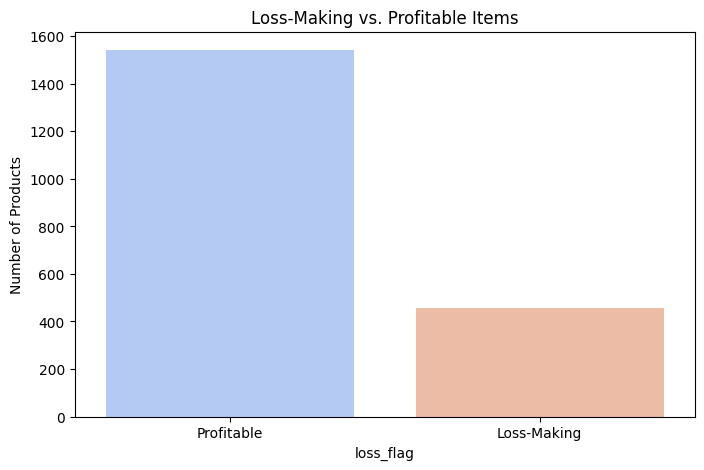

In [49]:
# Loss Making Vs Profitable
# Calculate counts
loss_counts = df['loss_flag'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=loss_counts.index, y=loss_counts.values, palette='coolwarm')
plt.xticks([0, 1], ['Profitable', 'Loss-Making'])
plt.ylabel('Number of Products')
plt.title('Loss-Making vs. Profitable Items')
plt.show()


##Project Summary

The analysis provides key insights into sales, pricing, and profitability trends within an e-commerce furniture business. By focusing on top-selling products, pricing distribution, and sales patterns, the study uncovers actionable strategies for improving revenue and profitability.

### Key Findings

- Chairs and tables bring in the most revenue, while desks and cabinets earn less.
- Most products are low-priced, showing customers prefer affordable options.
- A few products make up most sales, following the 80/20 rule.
- Sales are mainly in the low-cost range, with some high-revenue outliers.
- Tables and chairs give high profits; sofas and beds lose money.
- Discounts increase sales but can hurt profits if overused.
- Few products lose money, meaning the range is well-managed.
- Customers care about price and choose budget-friendly items.
- Discounts work but need careful control to protect profits.




##Conclusion

The analysis highlights the importance of focusing on high-performing products, maintaining competitive pricing, and strategically managing discounts. These strategies will help the business refine its marketing, inventory, and pricing approaches to enhance profitability and sustain long-term growth.





